In [1]:
# Packages
from requests import get
from bs4 import BeautifulSoup as bs
import itertools
import pandas as pd
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import os
from os import path
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Scraping all reviews about Bloomberg LP (London)

In [2]:
# Searching trustpilot
## Configurations
# Trustpilot review page
page_link1 = 'https://www.glassdoor.co.uk/Reviews/Bloomberg-L.P.-London-Reviews-EI_IE3096.0,14_IL.15,21_IM1035'
page_link2 = '.htm?filter.iso3Language=eng&filter.employmentStatus=REGULAR&filter.employmentStatus=PART_TIME'

numbers = list(range(1,95))
pageandnumbers=[]
for i in numbers:
  if i == 1:
    a = page_link1+page_link2
  else:
    a = page_link1+"_IP"+str(i)+page_link2
  pageandnumbers.append(a)

In [3]:
len(pageandnumbers)

94

In [6]:
# Defining the function
def scrapingpgs(a,b):
  headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:79.0) Gecko/20100101 Firefox/79.0'}
  allpg = []
  for i in list(range(a,b)):
    url = pageandnumbers[i]
    response = get(url, headers=headers)
    html_soup = bs(response.text, 'html.parser')
    allpg.append(html_soup)
  return allpg

In [7]:
pg_s = scrapingpgs(1,94)
pg_s


In [ ]:
# Selecting the pro reviews
reviews_pros = []
for i in pg_s:
    x = i.findAll('span', {'data-test':'pros'})
    reviews_pros.append(x)
reviews_pros

In [ ]:
# Converting to a list
proslist = []
for i in reviews_pros:
    a = [link.string for link in i]
    proslist.append(a)
proslist = [item for sublist in proslist for item in sublist]
proslist

In [ ]:
# Splitting the reviews
splitt = []
for i in reviews_pros:
    for j in i:
        splitt.append(j.text.split())



In [ ]:
# Converting the list of split reviews to string
listToStr = ' '.join([str(elem) for elem in proslist])
df_count = pd.DataFrame(proslist)
df_count.head()

In [ ]:
# Convert each sentence to lowercase and drop punctuation
df_count = df_count.apply(lambda x: x.astype(str).str.lower())
df_count[0] = df_count[0].str.replace('[^\w\s]','')

In [ ]:
# Dropping NAs if any
df_count = df_count.dropna()
df_count

In [ ]:
# Looking for most common words by grouping words
from collections import Counter
countss = Counter(" ".join(df_count[0]).split()).most_common(1000)
countss

In [ ]:
# Converting the above to a dataframe
countsdf= pd.DataFrame(countss)
countsdf

In [ ]:
# Tokenizing the df
wostop = []
words = list(countsdf[0])
stops = set(stopwords.words('english'))
new_stopwords = ['like', 'one', 'said', 'get', 'went', 'even', 'told', 'could', 'good', 'great', 'company']
stops = stops.union(new_stopwords)
for line in words:
    if line not in stops:
        wostop.append(line)

In [ ]:
countsdf1 = countsdf[countsdf[0].isin(wostop)]
countsdf1

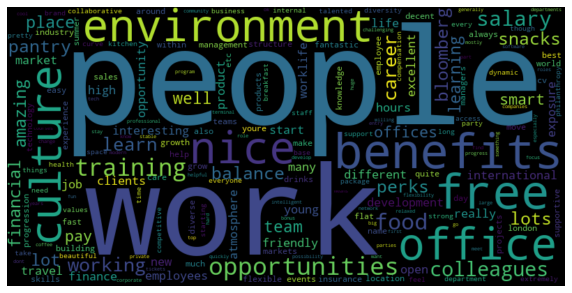

In [19]:
# Visualizing using Word coint frequency
# using word frequency list:
dataplot = dict(zip(countsdf1[0].tolist(), countsdf1[1].tolist()))

# Generate a word cloud image
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(dataplot)

# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()